In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob


In [10]:
def list_of_files(path='', extension='csv'):
    path = path
    extension = extension
    os.chdir(path)
    results = glob.glob('*.{}'.format(extension))
    return results

all_files = list_of_files(r'C:\Users\jlebowi\Desktop\24toCode\mequan', 'csv')

In [11]:
all_data = {}
for count, file in enumerate(all_files):
    all_data[file] = pd.read_csv(file)
    all_data[file].set_index('Date/Time', inplace=True)

In [12]:
all_data['Mequon 01 (West MFG).csv'].head()

,Date/Time,Real Power Demand,Real Energy Net,Reactive Energy Net,Average Current
0,1/1/2015 0:00,99.245476,19768970.00,26427170.00,195.351807
1,1/1/2015 0:15,105.387604,19768996.00,26427202.00,195.626450
2,1/1/2015 0:30,110.644981,19769024.00,26427236.00,197.640488
3,1/1/2015 0:45,105.523443,19769151.38,26427390.51,191.049118
4,1/1/2015 1:00,105.136955,19769076.00,26427298.00,198.098267


In [13]:
all_data['Mequon 02 (East MFG).csv'].head()

,Date/Time,Real Power Demand,Real Energy Net,Reactive Energy Net,Average Current,Average L-L Voltage
0,1/1/2015 0:00,311.725372,47206672.00,15873742.00,375.924438,484.886169
1,1/1/2015 0:15,317.339109,47207038.53,15873873.55,348.278198,485.552002
2,1/1/2015 0:30,308.171722,47206824.00,15873797.00,365.671631,485.689789
3,1/1/2015 0:45,305.181183,47206900.00,15873824.00,373.269470,485.907898
4,1/1/2015 1:00,317.339111,47206980.00,15873852.00,393.133850,485.678314


In [14]:
all_data['Mequon 05 (South MFG PM500).csv'].head()

,Date/Time,Total Real Energy,Avg Voltage L-L,Total Reactive Energy,Total Real Power Demand
0,1/1/2015 0:00,326063.7500,NaN,1086621.945,21.285981
1,1/1/2015 0:15,326069.0938,NaN,1086633.859,21.284019
2,1/1/2015 0:30,326074.4063,NaN,1086645.828,21.304714
3,1/1/2015 0:45,326079.7500,NaN,1086657.820,21.335331
4,1/1/2015 1:00,326085.0938,NaN,1086669.867,21.354470


In [499]:
df3 = pd.concat((all_data['Mequon 01 (West MFG).csv'], all_data['Mequon 02 (East MFG).csv']))
df3 = df3.groupby(df3.index).sum()
df4 = pd.concat((df3, all_data['Mequon 05 (South MFG PM500).csv']))
df4 = df4.groupby(df4.index).sum()

In [504]:
df4.to_csv('all_manufacturing_data.csv')

In [511]:
df4.head()

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
1/1/2015 0:00,4.338753e+07,6.730171e+07,432.256830
1/1/2015 0:15,4.338771e+07,6.730210e+07,444.010731
1/1/2015 0:30,4.338768e+07,6.730192e+07,440.121418
1/1/2015 0:45,4.338787e+07,6.730213e+07,432.039956
1/1/2015 10:00,4.339052e+07,6.730779e+07,711.265613


In [514]:
df4.index = pd.to_datetime(df4.index)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85561 entries, 1/1/2015 0:00 to 4/16/2018 19:00
Data columns (total 4 columns):
Total Real Energy          85555 non-null float64
Avg Voltage L-L            29994 non-null float64
Total Reactive Energy      85555 non-null float64
Total Real Power Demand    85543 non-null float64
dtypes: float64(4)
memory usage: 3.3+ MB


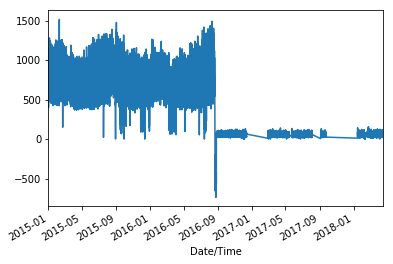

In [521]:
df4['Real Power Demand'].plot()

In [523]:
mask = (df4.index > '2016-09-06') & (df4.index <= '2017-03-03')

In [542]:
temp = df4[(df4.index > '2015-01-01') & (df4.index <= '2016-08-15')]

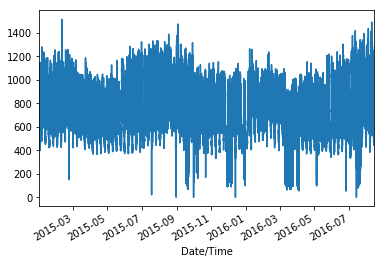

In [543]:
temp['Real Power Demand'].plot()

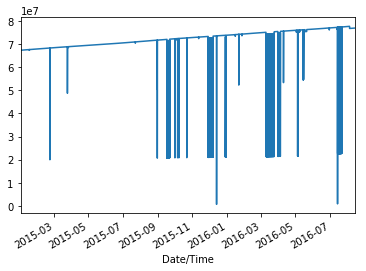

In [544]:
temp['Real Energy Net'].plot()

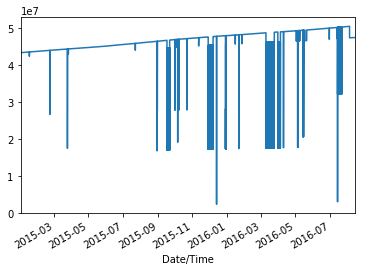

In [545]:
temp['Reactive Energy Net'].plot()

In [546]:
temp.head()

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
2015-01-01 00:15:00,4.338771e+07,6.730210e+07,444.010731
2015-01-01 00:30:00,4.338768e+07,6.730192e+07,440.121418
2015-01-01 00:45:00,4.338787e+07,6.730213e+07,432.039956
2015-01-01 10:00:00,4.339052e+07,6.730779e+07,711.265613
2015-01-01 10:15:00,4.339086e+07,6.730860e+07,687.768707


In [547]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56541 entries, 2015-01-01 00:15:00 to 2015-09-09 09:45:00
Data columns (total 3 columns):
Reactive Energy Net    56541 non-null float64
Real Energy Net        56541 non-null float64
Real Power Demand      56541 non-null float64
dtypes: float64(3)
memory usage: 1.7 MB


In [548]:
temp.tail()

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
2015-09-09 08:45:00,4.660379e+07,7.184195e+07,1068.943649
2015-09-09 09:00:00,4.660398e+07,7.184221e+07,1080.959360
2015-09-09 09:15:00,4.660413e+07,7.184247e+07,1012.228044
2015-09-09 09:30:00,4.660436e+07,7.184274e+07,1068.004918
2015-09-09 09:45:00,4.660459e+07,7.184301e+07,1071.359129


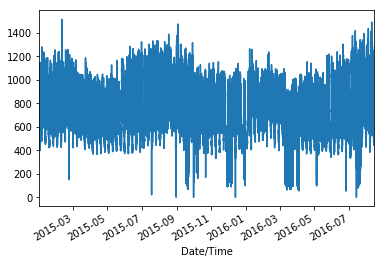

In [549]:
temp['Real Power Demand'].plot()

In [551]:
main = temp.sort_index()

In [568]:
main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56541 entries, 2015-01-01 00:15:00 to 2016-08-15 00:00:00
Data columns (total 3 columns):
Reactive Energy Net    56541 non-null float64
Real Energy Net        56541 non-null float64
Real Power Demand      56541 non-null float64
dtypes: float64(3)
memory usage: 4.2 MB


In [554]:
main.head()

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
2015-01-01 00:15:00,4.338771e+07,6.730210e+07,444.010731
2015-01-01 00:30:00,4.338768e+07,6.730192e+07,440.121418
2015-01-01 00:45:00,4.338787e+07,6.730213e+07,432.039956
2015-01-01 01:00:00,4.338782e+07,6.730214e+07,443.830536
2015-01-01 01:15:00,4.338789e+07,6.730225e+07,444.290947


In [583]:
one_day = main[(main.index < '2015-01-02')]

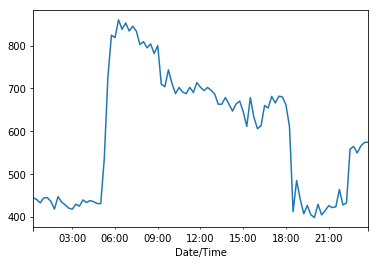

In [588]:
one_day['Real Power Demand'].plot()

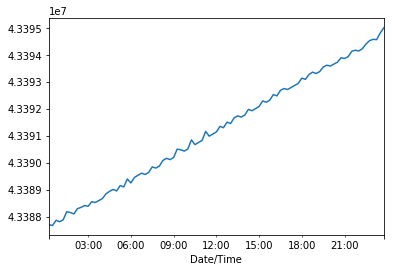

In [586]:
one_day['Reactive Energy Net'].plot()

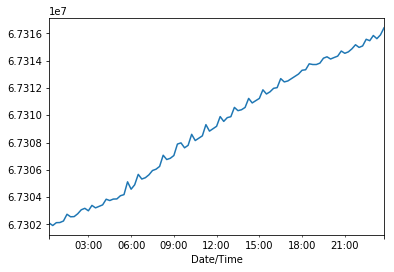

In [587]:
one_day['Real Energy Net'].plot()

In [565]:
times = pd.to_datetime(main.index)
gb = main.groupby([times.hour, times.minute])

In [571]:
gb.head(5)

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
2015-01-01 00:15:00,4.338771e+07,6.730210e+07,444.010731
2015-01-01 00:30:00,4.338768e+07,6.730192e+07,440.121418
2015-01-01 00:45:00,4.338787e+07,6.730213e+07,432.039956
2015-01-01 01:00:00,4.338782e+07,6.730214e+07,443.830536
2015-01-01 01:15:00,4.338789e+07,6.730225e+07,444.290947
2015-01-01 01:30:00,4.338819e+07,6.730275e+07,435.525169
2015-01-01 01:45:00,4.338816e+07,6.730256e+07,417.592242
2015-01-01 02:00:00,4.338811e+07,6.730258e+07,446.628095
2015-01-01 02:15:00,4.338831e+07,6.730278e+07,434.086969


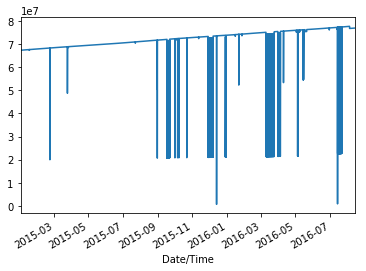

In [572]:
main['Real Energy Net'].plot()

In [592]:
main.head()

,Reactive Energy Net,Real Energy Net,Real Power Demand
Date/Time,,,
2015-01-01 00:15:00,4.338771e+07,6.730210e+07,444.010731
2015-01-01 00:30:00,4.338768e+07,6.730192e+07,440.121418
2015-01-01 00:45:00,4.338787e+07,6.730213e+07,432.039956
2015-01-01 01:00:00,4.338782e+07,6.730214e+07,443.830536
2015-01-01 01:15:00,4.338789e+07,6.730225e+07,444.290947


In [593]:
# Real power / (real power + reactive power)

In [597]:
(main['Real Energy Net'].iloc[0] / (main['Reactive Energy Net'].iloc[0] + main['Real Energy Net'].iloc[0]))

0.608024368094802

In [598]:
main['Efficiency'] = (main['Real Energy Net'] / (main['Reactive Energy Net'] + main['Real Energy Net']))

In [601]:
main.tail()

,Reactive Energy Net,Real Energy Net,Real Power Demand,Efficiency
Date/Time,,,,
2016-08-14 23:00:00,47497453.94,76896917.79,612.769357,0.618170
2016-08-14 23:15:00,47497527.25,76897057.07,629.433936,0.618170
2016-08-14 23:30:00,47497601.83,76897202.85,552.827323,0.618171
2016-08-14 23:45:00,47497674.55,76897348.80,591.074692,0.618171
2016-08-15 00:00:00,47497740.01,76897486.16,578.725160,0.618171


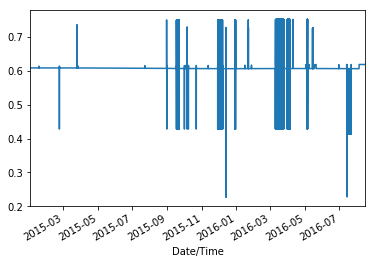

In [605]:
main['Efficiency'].plot()

In [606]:
main.to_csv('main_df.csv')